In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell()

In [3]:
# help(InteractiveShell)

In [4]:
def str_frequmcy_count(a):
    a = a.split()
    a = {i:a.count(i) for i in a }
    
    return len((sorted(a,key=lambda x:a.get(x),reverse=True))[0])

In [5]:
string = "write write write all the number from from from 1 to 100"
result = str_frequmcy_count(string)
result

5

In [6]:
# def is_valid_string(s):
#     frequencies = {i:s.count(i) for i in s}
#     print(frequencies)
#     print(frequencies.values())
#     for i in frequencies.values():
# #         print(i)
#         if i>=1:
#             if i>2:
#                 return 'NO'
#     return 'YES'
# is_valid_string('viirraal')

def is_valid_string(s):
    frequencies = {i: s.count(i) for i in s}
    unique_frequencies = list(set(frequencies.values()))

    if len(unique_frequencies) == 1:
        return 'YES'  # All characters have the same frequency

    if len(unique_frequencies) > 2:
        return 'NO'  # More than two different frequencies, not valid

    max_freq = max(unique_frequencies)
    min_freq = min(unique_frequencies)

    # Check if removing at most one character can make the frequencies the same
    if unique_frequencies.count(max_freq) == 1 and max_freq - min_freq == 1:
        return 'YES'
    
    if unique_frequencies.count(min_freq) == 1 and min_freq == 1:
        return 'YES'

    return 'NO'  # String is not valid

is_valid_string('viirraal')

'YES'

In [7]:
# # import pandas as pd
# # # import json
# # df = pd.DataFrame(data['pokemon'])
# # df.info()
# # df.isna().sum()



# import requests
# import json
# import pandas as pd

# def download_data(url):
#     response = requests.get(url)
#     if response.status_code == 200:
#         return response.json()
#     else:
#         print("Failed to download data from the URL.")
#         return None

# def process_data(data):
#     structured_data = []
#     for pokemon in data["pokemon"]:
#         multipliers = pokemon.get("multipliers")
#         if multipliers is None:
#             multipliers_str = ""
#         else:
#             multipliers_str = ", ".join(map(str, multipliers))

#         pokemon_data = {
#             "id": pokemon["id"],
#             "num": pokemon["num"],
#             "name": pokemon["name"],
#             "img": pokemon["img"],
#             "type": ", ".join(pokemon["type"]),
#             "height": pokemon["height"],
#             "weight": pokemon["weight"],
#             "candy": pokemon.get("candy", ""),
#             "candy_count": pokemon.get("candy_count", 0),
#             "egg": pokemon.get("egg", ""),
#             "spawn_chance": pokemon.get("spawn_chance", 0),
#             "avg_spawns": pokemon.get("avg_spawns", 0),
#             "spawn_time": pokemon.get("spawn_time", ""),
#             "multipliers": multipliers_str,
#             "weakness": ", ".join(pokemon.get("weaknesses", [])),
#             "next_evolution": ", ".join(
#                 [evolution["name"] for evolution in pokemon.get("next_evolution", [])]
#             ),
#             "prev_evolution": ", ".join(
#                 [evolution["name"] for evolution in pokemon.get("prev_evolution", [])]
#             )
#         }
#         structured_data.append(pokemon_data)
#     return structured_data

# def create_excel(data, output_file):
#     df = pd.DataFrame(data)
#     df.to_excel(output_file, index=False)

# # Download the data from the provided link
# url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
# json_data = download_data(url)

# if json_data:
#     # Process the data
#     structured_data = process_data(json_data)

#     # Create an Excel file
#     output_file = "pokemon_data.xlsx"
#     create_excel(structured_data, output_file)
#     print(f"Data saved to {output_file}.")



####################################################################################################
####################################################################################################
####################################################################################################

import requests

def download_json_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for any unsuccessful status codes
        json_data = response.json()
        return json_data
    except requests.exceptions.RequestException as e:
        print("Error downloading JSON data:", str(e))
        return None

# Example usage
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"  # Replace with the actual URL of the JSON data
data = download_json_data(url)
# from pprint import pprint
# if data is not None:
#     pprint(data)

import pandas as pd
# import json
df = pd.DataFrame(data['pokemon'])
df.to_excel('pokemon_data.xlsx',index=False)
df

Error downloading JSON data: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Biuni/PokemonGO-Pokedex/master/pokedex.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)')))


TypeError: 'NoneType' object is not subscriptable

In [8]:
import requests
import csv
import json

def extract_value(entry, key, default=None, data_type=str):
    value = entry.get(key)
    if value is not None:
        try:
            return data_type(value)
        except (ValueError, TypeError):
            pass
    return default

def download_meteorite_data(url, csv_filename):
    # Download the data from the URL
#     response = requests.get(url)
#     data = response.json()
    with open('meteorite_data.json', "r",encoding="utf-8") as jsonfile:
        data = json.load(jsonfile)
    

    # Extract the required fields from the data
    meteorite_data = []
    for entry in data:
        name = extract_value(entry, "name")
        id = extract_value(entry, "id")
        nametype = extract_value(entry, "nametype")
        recclass = extract_value(entry, "recclass")
        mass = extract_value(entry, "mass", default=None, data_type=float)
        year = extract_value(entry, "year")
        reclat = extract_value(entry, "reclat", default=None, data_type=float)
        reclong = extract_value(entry, "reclong", default=None, data_type=float)
        coordinates = entry.get("geolocation", {}).get("coordinates", [])

        # Append the extracted data to the list
        meteorite_data.append([name, id, nametype, recclass, mass, year, reclat, reclong, coordinates])

    # Write the data to a CSV file
    with open(csv_filename, "w", newline="",encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["name", "id", "nametype", "recclass", "mass", "year", "reclat", "reclong", "coordinates"])
        writer.writerows(meteorite_data)

    print("CSV file created successfully!")
    return meteorite_data

# Define the URL of the meteorite data
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Define the filename for the CSV file
csv_filename = "meteorite_data.csv"

# Call the function to download and convert the data
a= download_meteorite_data(url, csv_filename)
pd.DataFrame(a)

CSV file created successfully!


0      1      2                      3         4   
0       Aachen      1  Valid                     L5      21.0  \
1       Aarhus      2  Valid                     H6     720.0   
2         Abee      6  Valid                    EH4  107000.0   
3     Acapulco     10  Valid            Acapulcoite    1914.0   
4      Achiras    370  Valid                     L6     780.0   
..         ...    ...    ...                    ...       ...   
995   Tirupati  24009  Valid                     H6     230.0   
996    Tissint  54823  Valid  Martian (shergottite)    7000.0   
997      Tjabe  24011  Valid                     H6   20000.0   
998   Tjerebon  24012  Valid                     L5   16500.0   
999  Tomakovka  24019  Valid                    LL6     600.0   

                           5         6          7                      8  
0    1880-01-01T00:00:00.000  50.77500    6.08333      [6.08333, 50.775]  
1    1951-01-01T00:00:00.000  56.18333   10.23333   [10.23333, 56.18333]  
2    1952-01-01T00:00:00.000  54.21667 -113.00000       [-113, 54.21667]  
3    1976-01-01T00:00:00.000  16.88333  -99.90000      [-99.9, 16.88333]  
4    1902-01-01T00:00:00.000 -33.16667  -64.95000    [-64.95, -33.16667]  
..                       ...       ...        ...                    ...  
995  1934-01-01T00:00:00.000  13.63333   79.41667   [79.41667, 13.63333]  
996  2011-01-01T00:00:00.000  29.48195   -7.61123   [-7.61123, 29.48195]  
997  1869-01-01T00:00:00.000  -7.08333  111.53333  [111.53333, -7.08333]  
998  1922-01-01T00:00:00.000  -6.66667  106.58333  [106.58333, -6.66667]  
999  1905-01-01T00:00:00.000  47.85000   34.76667      [34.76667, 47.85]  

[1000 rows x 9 columns]

In [9]:
import requests
import csv
from bs4 import BeautifulSoup

# Function to download data from the API link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to download data from the API.")
        return None

# Function to extract the required attributes from the data
def extract_attributes(data):
    show_id = data.get("id", "")
    url = data.get("url", "")
    name = data.get("name", "")
    episodes = data.get("_embedded", {}).get("episodes", [])
    
    extracted_data = []
    for episode in episodes:
        episode_id = episode.get("id", "")
        episode_url = episode.get("url", "")
        episode_name = episode.get("name", "")
        season = episode.get("season", "")
        number = episode.get("number", "")
        episode_type = episode.get("type", "")
        airdate = episode.get("airdate", "")
        airtime = episode.get("airtime", "")
        runtime = episode.get("runtime", "")
        average_rating = episode.get("rating", {}).get("average", "")
        summary = episode.get("summary", "")
        medium_image = episode.get("image", {}).get("medium", "")
        original_image = episode.get("image", {}).get("original", "")
        
        # Remove HTML tags from the summary
        summary = BeautifulSoup(summary, "html.parser").get_text().strip()
        
        extracted_data.append({
            "id": episode_id,
            "url": episode_url,
            "name": episode_name,
            "season": season,
            "number": number,
            "type": episode_type,
            "airdate": airdate,
            "airtime": airtime,
            "runtime": runtime,
            "average_rating": average_rating,
            "summary": summary,
            "medium_image": medium_image,
            "original_image": original_image
        })
    
    return extracted_data

# Function to format the extracted data
def format_data(data):
    formatted_data = []
    for entry in data:
        formatted_entry = {
            "id": int(entry["id"]),
            "url": entry["url"],
            "name": entry["name"],
            "season": int(entry["season"]),
            "number": int(entry["number"]),
            "type": entry["type"],
            "airdate": entry["airdate"],
            "airtime": entry["airtime"],
            "runtime": float(entry["runtime"]),
            "average_rating": float(entry["average_rating"]),
            "summary": entry["summary"],
            "medium_image": entry["medium_image"],
            "original_image": entry["original_image"]
        }
        formatted_data.append(formatted_entry)
    
    return formatted_data

# Function to save the data as a CSV file
def save_as_csv(data, filename):
    keys = data[0].keys()
    with open(filename, "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=keys)
        writer.writeheader()
        writer.writerows(data)

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download data from the API
json_data = download_data(api_link)

if json_data:
    # Extract and format the required attributes
    extracted_data = extract_attributes(json_data)
    formatted_data = format_data(extracted_data)

    # Save the data as a CSV file
    save_as_csv(formatted_data, "westworld_episodes.csv")

    print("Data saved successfully as westworld_episodes.csv.")
pd.DataFrame((formatted_data))

Data saved successfully as westworld_episodes.csv.


id                                                url   
0    869671  https://www.tvmaze.com/episodes/869671/westwor...  \
1    911201  https://www.tvmaze.com/episodes/911201/westwor...   
2    911204  https://www.tvmaze.com/episodes/911204/westwor...   
3    911205  https://www.tvmaze.com/episodes/911205/westwor...   
4    927174  https://www.tvmaze.com/episodes/927174/westwor...   
5    932057  https://www.tvmaze.com/episodes/932057/westwor...   
6    938404  https://www.tvmaze.com/episodes/938404/westwor...   
7    943065  https://www.tvmaze.com/episodes/943065/westwor...   
8    943066  https://www.tvmaze.com/episodes/943066/westwor...   
9    943067  https://www.tvmaze.com/episodes/943067/westwor...   
10  1214222  https://www.tvmaze.com/episodes/1214222/westwo...   
11  1440915  https://www.tvmaze.com/episodes/1440915/westwo...   
12  1440916  https://www.tvmaze.com/episodes/1440916/westwo...   
13  1440917  https://www.tvmaze.com/episodes/1440917/westwo...   
14  1446362  https://www.tvmaze.com/episodes/1446362/westwo...   
15  1453278  https://www.tvmaze.com/episodes/1453278/westwo...   
16  1459961  https://www.tvmaze.com/episodes/1459961/westwo...   
17  1459788  https://www.tvmaze.com/episodes/1459788/westwo...   
18  1459789  https://www.tvmaze.com/episodes/1459789/westwo...   
19  1459790  https://www.tvmaze.com/episodes/1459790/westwo...   
20  1789333  https://www.tvmaze.com/episodes/1789333/westwo...   
21  1800146  https://www.tvmaze.com/episodes/1800146/westwo...   
22  1800147  https://www.tvmaze.com/episodes/1800147/westwo...   
23  1800148  https://www.tvmaze.com/episodes/1800148/westwo...   
24  1800149  https://www.tvmaze.com/episodes/1800149/westwo...   
25  1829375  https://www.tvmaze.com/episodes/1829375/westwo...   
26  1800151  https://www.tvmaze.com/episodes/1800151/westwo...   
27  1800152  https://www.tvmaze.com/episodes/1800152/westwo...   
28  2326389  https://www.tvmaze.com/episodes/2326389/westwo...   
29  2326655  https://www.tvmaze.com/episodes/2326655/westwo...   
30  2326656  https://www.tvmaze.com/episodes/2326656/westwo...   
31  2326657  https://www.tvmaze.com/episodes/2326657/westwo...   
32  2326658  https://www.tvmaze.com/episodes/2326658/westwo...   
33  2326659  https://www.tvmaze.com/episodes/2326659/westwo...   
34  2326660  https://www.tvmaze.com/episodes/2326660/westwo...   
35  2326661  https://www.tvmaze.com/episodes/2326661/westwo...   

                         name  season  number     type     airdate airtime   
0                The Original       1       1  regular  2016-10-02   21:00  \
1                    Chestnut       1       2  regular  2016-10-09   21:00   
2                   The Stray       1       3  regular  2016-10-16   21:00   
3           Dissonance Theory       1       4  regular  2016-10-23   21:00   
4                 Contrapasso       1       5  regular  2016-10-30   21:00   
5               The Adversary       1       6  regular  2016-11-06   21:00   
6               Trompe L'Oeil       1       7  regular  2016-11-13   21:00   
7                 Trace Decay       1       8  regular  2016-11-20   21:00   
8   The Well-Tempered Clavier       1       9  regular  2016-11-27   21:00   
9          The Bicameral Mind       1      10  regular  2016-12-04   21:00   
10         Journey Into Night       2       1  regular  2018-04-22   21:00   
11                    Reunion       2       2  regular  2018-04-29   21:00   
12            Virtù e Fortuna       2       3  regular  2018-05-06   21:00   
13   The Riddle of the Sphinx       2       4  regular  2018-05-13   21:00   
14               Akane No Mai       2       5  regular  2018-05-20   21:00   
15                Phase Space       2       6  regular  2018-05-27   21:00   
16               Les Écorchés       2       7  regular  2018-06-03   21:00   
17                    Kiksuya       2       8  regular  2018-06-10   21:00   
18            Vanishing Point       2       9  regular  2018-06-17   21:00   
19    

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 
Note : Draw plots to demonstrate the analysis for the following questions for better visualizations.
Insights to be drawn -<br>
● Get all Pokemons whose spawn rate is less than 5% <br>
● Get all Pokemons that have less than 4 weaknesses<br>
● Get all Pokemons that have no multipliers at all<br>
● Get all Pokemons that do not have more than 2 evolutions<br>
● Get all Pokemons whose spawn time is less than 300 seconds.<br>
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.<br>
● Get all Pokemon who have more than two types of capabilities<br>


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the structured data from the Excel file
data = pd.read_excel('pokemon_data.xlsx')
data

id  num        name                                               img   
0      1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png  \
1      2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

               type  height    weight             candy  candy_count   
0     Grass, Poison  0.71 m    6.9 kg   Bulbasaur Candy           25  \
1     Grass, Poison  0.99 m   13.0 kg   Bulbasaur Candy          100   
2     Grass, Poison  2.01 m  100.0 kg   Bulbasaur Candy            0   
3              Fire  0.61 m    8.5 kg  Charmander Candy           25   
4              Fire  1.09 m   19.0 kg  Charmander Candy          100   
..              ...     ...       ...               ...          ...   
146          Dragon  1.80 m    3.3 kg     Dratini Candy           25   
147          Dragon  3.99 m   16.5 kg     Dratini Candy          100   
148  Dragon, Flying  2.21 m  210.0 kg     Dratini Candy            0   
149         Psychic  2.01 m  122.0 kg               NaN            0   
150         Psychic  0.41 m    4.0 kg               NaN            0   

             egg  spawn_chance  avg_spawns spawn_time multipliers   
0           2 km        0.6900       69.00      20:00        1.58  \
1    Not in Eggs        0.0420        4.20      07:00    1.2, 1.6   
2    Not in Eggs        0.0170        1.70      11:30         NaN   
3           2 km        0.2530       25.30      08:45        1.65   
4    Not in Eggs        0.0120        1.20      19:00        1.79   
..           ...           ...         ...        ...         ...   
146        10 km        0.3000       30.00      06:41  1.83, 1.84   
147  Not in Eggs        0.0200        2.00      11:57        2.05   
148  Not in Eggs        0.0011        0.11      23:38         NaN   
149  Not in Eggs        0.0000        0.00        NaN         NaN   
150  Not in Eggs        0.0000        0.00        NaN         NaN   

                       weakness         next_evolution      prev_evolution  
0    Fire, Ice, Flying, Psychic      Ivysaur, Venusaur                 NaN  
1    Fire, Ice, Flying, Psychic               Venusaur           Bulbasaur  
2    Fire, Ice, Flying, Psychic                    NaN  Bulbasaur, Ivysaur  
3           Water, Ground, Rock  Charmeleon, Charizard                 NaN  
4           Water, Ground, Rock              Charizard          Charmander  
..                          ...                    ...                 ...  
146          Ice, Dragon, Fairy   Dragonair, Dragonite                 NaN  
147          Ice, Dragon, Fairy              Dragonite             Dratini  
148    Ice, Rock, Dragon, Fairy                    NaN  Dratini, Dragonair  
149            Bug, Ghost, Dark                    NaN                 NaN  
150            Bug, Ghost, Dark                    NaN                 NaN  

[151 rows x 17 columns]

In [11]:
import pandas as pd
import plotly.express as px

# Read the structured data from the Excel file
data = pd.read_excel('pokemon_data.xlsx')

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = data[data['spawn_chance'] < 5]
print(f'--->Get all Pokemons whose spawn rate is less than 5%  :  {spawn_rate_less_than_5.shape} \n {spawn_rate_less_than_5.head()}')
print("=====================================================================================================================")

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = data[data['weakness'].apply(lambda x: len(x.split(','))) < 4]
print(f'--->Get all Pokemons that have less than 4 weaknesses  :  {less_than_4_weaknesses.shape} \n {less_than_4_weaknesses.head()}')
print("=====================================================================================================================")

# Get all Pokemons that have no multipliers at all
no_multipliers = data[data['multipliers'].isnull()]
print(f'--->Get all Pokemons that have no multipliers at all  :  {no_multipliers.shape} \n {no_multipliers.head()}')
print("=====================================================================================================================")


# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = data[data['next_evolution'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0) < 2]
print(f'--->Get all Pokemons that do not have more than 2 evolutions  :  {less_than_2_evolutions.shape} \n {less_than_2_evolutions.head()}')
print("=====================================================================================================================")


# Convert the spawn_time column to a datetimelike format
# Convert the spawn time to seconds
data['spawn_time_seconds'] = pd.to_datetime(data['spawn_time'], format='%H:%M').dt.hour * 3600 + pd.to_datetime(data['spawn_time'], format='%H:%M').dt.minute * 60

# Filter Pokémon with spawn time less than 300 seconds (5 minutes)
spawn_time_less_than_300 = data[data['spawn_time_seconds'] < 300]

# Display the filtered DataFrame
spawn_time_less_than_300
print(f'--->Get all Pokemons whose spawn time is less than 300 seconds  :  {spawn_time_less_than_300.shape} \n {spawn_time_less_than_300.head()}')
print("=====================================================================================================================")

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = data[data['type'].apply(lambda x: len(x.split(','))) > 2]
print(f'--->Get all Pokemon who have more than two types of capabilities  : {more_than_2_types.shape} \n {more_than_2_types.head()}')
print("=====================================================================================================================")


# Plot 1: Distribution of spawn rates using Plotly
fig1 = px.histogram(data, x='spawn_chance', nbins=10, title='Distribution of Spawn Rates')
fig1.show()
print(f'{"*-*-"*30}')

# Plot 2: Bar chart of number of weaknesses using Plotly
fig2 = px.histogram(less_than_4_weaknesses, x='weakness', title='Number of Weaknesses in Pokemons')
fig2.show()
print(f'{"*-*-"*30}')

# Plot 3: Bar chart of multipliers availability using Plotly
fig3 = px.histogram(no_multipliers, x='multipliers', title='Availability of Multipliers in Pokemons')
fig3.show()
print(f'{"*-*-"*30}')

# Plot 4: Bar chart of number of evolutions using Plotly
fig4 = px.histogram(less_than_2_evolutions, x='next_evolution', title='Number of Evolutions in Pokemons')
fig4.show()
print(f'{"*-*-"*30}')

# Plot 5: Distribution of spawn time using Plotly
fig5 = px.histogram(spawn_time_less_than_300, x='spawn_time_seconds', nbins=10, title='Distribution of Spawn Time')
fig5.show()
print(f'{"*-*-"*30}')

# Plot 6: Bar chart of number of types using Plotly
fig6 = px.histogram(more_than_2_types, x='type', title='Number of Types in Pokemons')
fig6.show()
print(f'{"*-*-"*30}')


--->Get all Pokemons whose spawn rate is less than 5%  :  (147, 17) 
    id  num        name                                               img   
0   1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png  \
1   2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2   3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3   4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4   5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   

            type  height    weight             candy  candy_count   
0  Grass, Poison  0.71 m    6.9 kg   Bulbasaur Candy           25  \
1  Grass, Poison  0.99 m   13.0 kg   Bulbasaur Candy          100   
2  Grass, Poison  2.01 m  100.0 kg   Bulbasaur Candy            0   
3           Fire  0.61 m    8.5 kg  Charmander Candy           25   
4           Fire  1.09 m   19.0 kg  Charmander Candy          100   

           egg  spawn_chance  avg_spawns spawn_time multip

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [12]:
help(plt.bar_label)

Help on function bar_label in module matplotlib.pyplot:

bar_label(container, labels=None, *, fmt='%g', label_type='edge', padding=0, **kwargs)
    Label a bar plot.
    
    Adds labels to bars in the given `.BarContainer`.
    You may need to adjust the axis limits to fit the labels.
    
    Parameters
    ----------
    container : `.BarContainer`
        Container with all the bars and optionally errorbars, likely
        returned from `.bar` or `.barh`.
    
    labels : array-like, optional
        A list of label texts, that should be displayed. If not given, the
        label texts will be the data values formatted with *fmt*.
    
    fmt : str, default: '%g'
        A format string for the label.
    
    label_type : {'edge', 'center'}, default: 'edge'
        The label type. Possible values:
    
        - 'edge': label placed at the end-point of the bar segment, and the
          value displayed will be the position of that end-point.
        - 'center': label placed in t

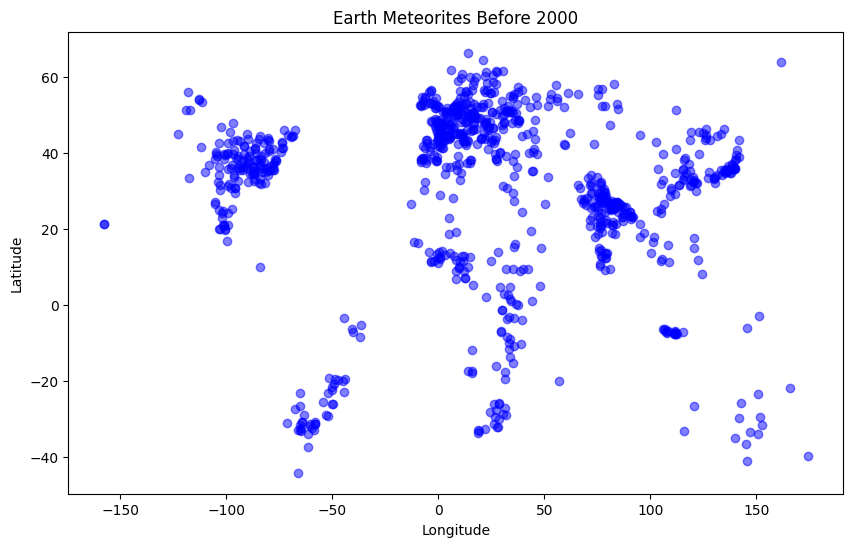

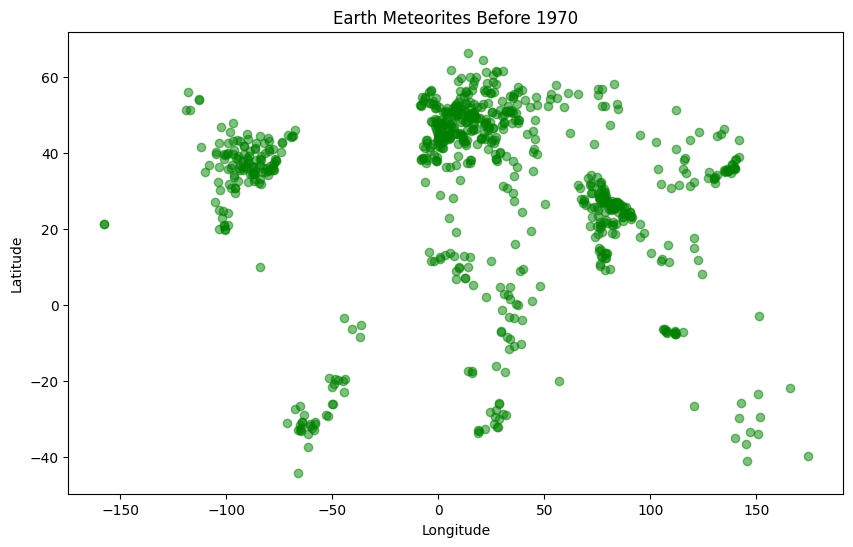

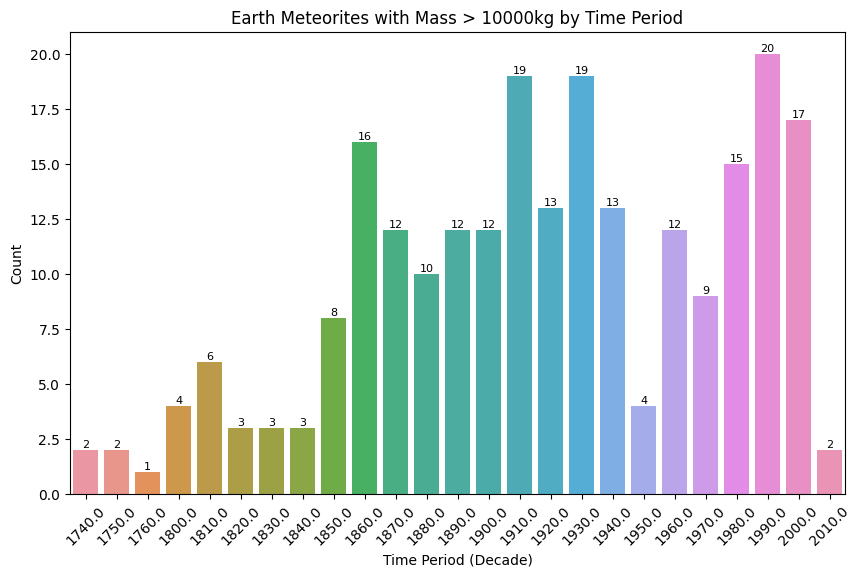

Earth Meteorites Before 2000:
        id       name    reclat    reclong      mass       year
0        1     Aachen  50.77500    6.08333      21.0 1880-01-01
1        2     Aarhus  56.18333   10.23333     720.0 1951-01-01
2        6       Abee  54.21667 -113.00000  107000.0 1952-01-01
3       10   Acapulco  16.88333  -99.90000    1914.0 1976-01-01
4      370    Achiras -33.16667  -64.95000     780.0 1902-01-01
..     ...        ...       ...        ...       ...        ...
994  24004   Timochin  54.50000   35.20000   65500.0 1807-01-01
995  24009   Tirupati  13.63333   79.41667     230.0 1934-01-01
997  24011      Tjabe  -7.08333  111.53333   20000.0 1869-01-01
998  24012   Tjerebon  -6.66667  106.58333   16500.0 1922-01-01
999  24019  Tomakovka  47.85000   34.76667     600.0 1905-01-01

[903 rows x 6 columns]
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Earth Meteorites Before 1970:
        id       name    re

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('meteorite_data.csv')
# print(df.columns)
# Convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], errors='coerce')
timestamp_2000 = pd.Timestamp(2000, 1, 1)
# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[(df['reclat'].notnull()) & (df['year'] < timestamp_2000)]

timestamp_1970 = pd.Timestamp(1970, 1, 1)

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[(df['reclat'].notnull()) & (df['year'] < timestamp_1970)]

# Get all the Earth meteorites whose mass was more than 10000kg
earth_meteorites_mass_gt_10000kg = df[(df['reclat'].notnull()) & (df['mass'] > 10000)]

# Plotting the data

# Scatter plot of Earth meteorites before 2000
plt.figure(figsize=(10, 6));
plt.scatter(earth_meteorites_before_2000['reclong'], earth_meteorites_before_2000['reclat'], color='blue', alpha=0.5);
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('Earth Meteorites Before 2000');
plt.show();
print("=====================================================================================================================")

# Scatter plot of Earth meteorites before 1970
plt.figure(figsize=(10, 6));
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], color='green', alpha=0.5);
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('Earth Meteorites Before 1970');
plt.show();
print("=====================================================================================================================")

# Histogram of Earth meteorites with mass > 10000kg
mass_gt_10000kg_count = df[df['mass'] > 10000].groupby(df['year'].dt.year // 10 * 10).size();

plt.figure(figsize=(10, 6));
br_plt=sns.barplot(x=mass_gt_10000kg_count.index, y=mass_gt_10000kg_count.values);
plt.xlabel('Time Period (Decade)');
plt.ylabel('Count');
plt.title('Earth Meteorites with Mass > 10000kg by Time Period');
plt.xticks(rotation=45);
br_plt.bar_label(br_plt.containers[0], label_type='edge', fontsize=8);
plt.show();
print("=====================================================================================================================")

# Print the resulting dataframes
print("Earth Meteorites Before 2000:")
print(earth_meteorites_before_2000[['id', 'name', 'reclat', 'reclong', 'mass', 'year']])
print(f'{"*-*-"*30}')

print("Earth Meteorites Before 1970:")
print(earth_meteorites_before_1970[['id', 'name', 'reclat', 'reclong', 'mass', 'year']])
print(f'{"*-*-"*30}')

print("Earth Meteorites with Mass > 10000kg:")
print(earth_meteorites_mass_gt_10000kg[['id', 'name', 'reclat', 'reclong', 'mass', 'year']])
print(f'{"*-*-"*30}')


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('westworld_episodes.csv',encoding='latin_1')
# df.head()

import plotly.express as px

# Calculate the average ratings for each season
season_ratings = df.groupby('season')['average_rating'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(season_ratings, x='season', y='average_rating',
             color='average_rating', color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    title='Average Ratings for Each Season',
    xaxis_title='Season',
    yaxis_title='Average Rating',
    xaxis=dict(tickangle=0),
);
fig.update_traces(text=season_ratings['average_rating'].round(2), textposition='outside')

fig.show()

print("=====================================================================================================================")

# Filter episodes with average rating > 8 for each season
high_rated_episodes = df[df['average_rating'] > 8].groupby('season')['name'].unique()

# Print the high-rated episodes for each season
for season, episodes in high_rated_episodes.items():
    print(f"Season {season}:")
    for episode in episodes:
        print(f"- {episode}")
    print()

Season 1:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind

Season 2:
- Kiksuya
- Vanishing Point
- The Passenger



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


link = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(link)
df[~(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible')]

VIN (1-10)    County        City State  Postal Code  Model Year   
6       3FA6P0PU1G  Thurston    Tumwater    WA      98501.0        2016  \
7       WA1F2AFY8P  Thurston       Lacey    WA      98516.0        2023   
8       1FADP5CU0E  Thurston   Rochester    WA      98579.0        2014   
11      7SAYGDEF4N    Yakima      Yakima    WA      98908.0        2022   
14      1FADP5FU4H  Thurston       Lacey    WA      98513.0        2017   
...            ...       ...         ...   ...          ...         ...   
130437  WBA13AG06M  Thurston     Olympia    WA      98501.0        2021   
130438  7SAYGDEE6P    Pierce  Gig Harbor    WA      98335.0        2023   
130439  1N4BZ1CV7N    Pierce      Tacoma    WA      98408.0        2022   
130440  5YJYGDEE8M      King     Seattle    WA      98109.0        2021   
130442  5YJ3E1EA5M    Pierce    Puyallup    WA      98375.0        2021   

          Make    Model                   Electric Vehicle Type   
6         FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)  \
7         AUDI     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
8         FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
11       TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
14        FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
...        ...      ...                                     ...   
130437     BMW     530E  Plug-in Hybrid Electric Vehicle (PHEV)   
130438   TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
130439  NISSAN     LEAF          Battery Electric Vehicle (BEV)   
130440   TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
130442   TESLA  MODEL 3          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
6                   Not eligible due to low battery range              19  \
7                   Not eligible due to low battery range              23   
8                   Not eligible due to low battery range              19   
11      Eligibility unknown as battery range has not b...               0   
14                  Not eligible due to low battery range              20   
...                                                   ...             ...   
130437              Not eligible due to low battery range              21   
130438  Eligibility unknown as battery range has not b...               0   
130439  Eligibility unknown as battery range has not b...               0   
130440  Eligibility unknown as battery range has not b...               0   
130442  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID   
6               0                  22.0       347508836  \
7               0                  22.0       227213871   
8               0                  20.0       229811151   
11              0                  14.0       187486883   
14              0                  22.0       139887513   
...           ...                   ...             ...   
130437          0                  22.0       196559310   
130438          0                  26.0       231134102   
130439          0                  29.0       185810943   
130440          0                  36.0       176542418   
130442          0                   2.0       180473639   

                                      Vehicle Location   
6                          POINT (-122.89166 47.03956)  \
7                          POINT (-122.75379 47.06316)   
8                          POINT (-123.08743 46.82175)   
11                         POINT (-120.56916 46.58514)   
14       POINT (-122.81754499999994 46.98876000000007)   
...                                                ...   
130437                     POINT (-122.89166 47.03956)   
130438   POINT (-122.58354539999999 47.32344880000005)   
130439  POINT (-122.43810499999995 47.203220000000044)   
130440                     POINT (-122.35022 47.63824)   
130442                      PO

Q -2------------>
         VIN (1-10)    County        City State  Postal Code  Model Year   
6       3FA6P0PU1G  Thurston    Tumwater    WA      98501.0        2016  \
7       WA1F2AFY8P  Thurston       Lacey    WA      98516.0        2023   
8       1FADP5CU0E  Thurston   Rochester    WA      98579.0        2014   
11      7SAYGDEF4N    Yakima      Yakima    WA      98908.0        2022   
14      1FADP5FU4H  Thurston       Lacey    WA      98513.0        2017   
...            ...       ...         ...   ...          ...         ...   
130437  WBA13AG06M  Thurston     Olympia    WA      98501.0        2021   
130438  7SAYGDEE6P    Pierce  Gig Harbor    WA      98335.0        2023   
130439  1N4BZ1CV7N    Pierce      Tacoma    WA      98408.0        2022   
130440  5YJYGDEE8M      King     Seattle    WA      98109.0        2021   
130442  5YJ3E1EA5M    Pierce    Puyallup    WA      98375.0        2021   

          Make    Model                   Electric Vehicle Type   
6         FOR

AttributeError: 'AxesSubplot' object has no attribute 'show'

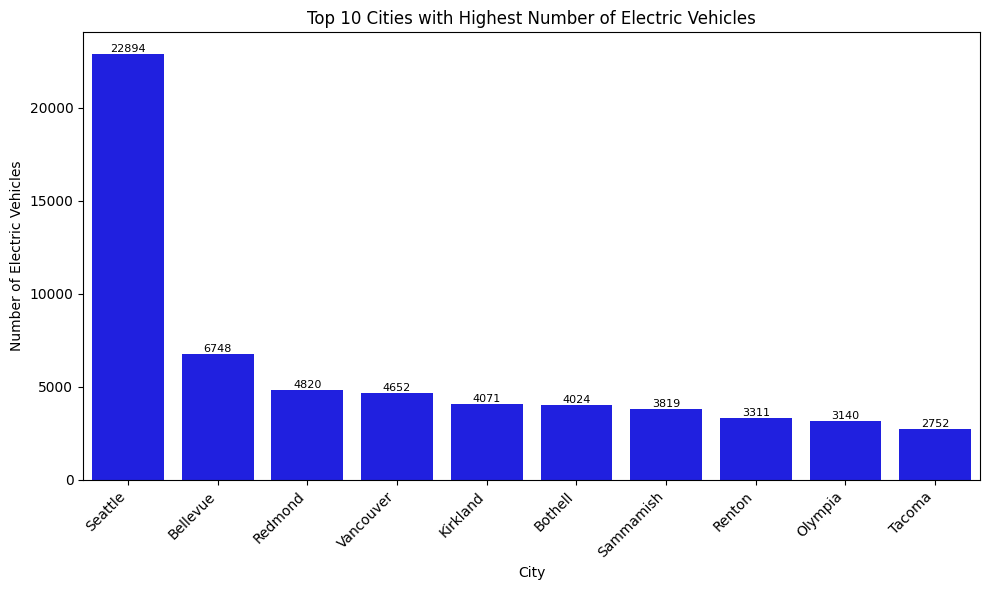

In [24]:
print('Q -2------------>\n',df[~(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible')])
print('Q -2------------>\n',df[(df['Make']=='TESLA') & (df['City']=='Bothell')][['Make','Model Year','Electric Vehicle Type']])
# Filter the data for electric vehicles with electric range > 100 and made after 2015
print('Q -2------------>\n',df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)])

# Get the top 10 cities with the highest number of electric vehicles
top_cities = df['City'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
fig= sns.barplot(x=top_cities.index, y=top_cities.values, color='blue')
fig.bar_label(fig.containers[0], label_type='edge', fontsize=8);
plt.title('Top 10 Cities with Highest Number of Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
fig.show()

In [34]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('123.csv')

# Clean the 'Coordinates' column by removing unwanted characters
data['Coordinates'] = data['Coordinates'].str.replace('[\(\)]', '', regex=True)

# Extract latitude and longitude from the 'Coordinates' column
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(', ', expand=True)

# Convert latitude and longitude to float
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Create a scatter plot on a world map
fig = px.scatter_geo(data, lat='Latitude', lon='Longitude', scope='world')

# Customize the plot
fig.update_layout(
    title='Geographic Distribution of Electric Vehicles',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        coastlinecolor='rgb(243, 243, 243)',
        showocean=True,
        oceancolor='rgb(204, 255, 255)',
        showcountries=True,
        countrycolor='rgb(204, 204, 204)',
        showframe=True,
        framecolor='rgb(0, 0, 0)',
        projection=dict(type='natural earth')
    )
)

# Show the plot
fig.show()


In [31]:
# 1000 datapoint to be shown
data = pd.read_csv('123.csv')
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Coordinates'],
      dtype='object')

In [33]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('123.csv')

# Clean the 'Coordinates' column by removing unwanted characters
data['Coordinates'] = data['Coordinates'].str.replace('[\(\)]', '', regex=True)

# Extract latitude and longitude from the 'Coordinates' column
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(', ', expand=True)

# Convert latitude and longitude to float
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Create a scatter plot on a world map
fig = px.scatter_geo(data, lat='Latitude', lon='Longitude', scope='world')

# Customize the plot
fig.update_layout(
    title='Geographic Distribution of Electric Vehicles',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        coastlinecolor='rgb(243, 243, 243)',
        showocean=True,
        oceancolor='rgb(204, 255, 255)',
        showcountries=True,
        countrycolor='rgb(204, 204, 204)',
        showframe=True,
        framecolor='rgb(0, 0, 0)',
        projection=dict(type='natural earth')
    )
)

# Show the plot
fig.show()


Q-10 Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example Output -
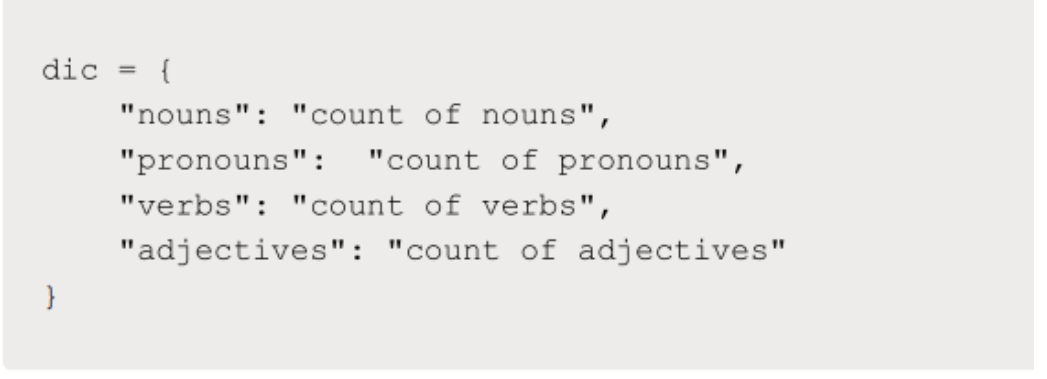

In [4]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

# Define the given phrase or paragraph
text = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type
and scrambled it to make a type specimen book. It has survived not only five centuries, but also 
the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 
1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum
"""

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Initialize count variables
verb_count = 0
noun_count = 0
pronoun_count = 0
adjective_count = 0

# Iterate through each sentence
for sentence in sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Perform POS tagging on the words
    tagged_words = pos_tag(words)
    print(tagged_words)
    
    # Iterate through each tagged word
    for word, tag in tagged_words:
        # Check the tag and increment the respective count variable
        if tag.startswith('V'):
            verb_count += 1
        elif tag.startswith('N'):
            noun_count += 1
        elif tag.startswith('PRP'):
            pronoun_count += 1
        elif tag.startswith('JJ'):
            adjective_count += 1

# Create a dictionary to store the counts
counts = {
    'verbs': verb_count,
    'nouns': noun_count,
    'pronouns': pronoun_count,
    'adjectives': adjective_count
}

# Print the count dictionary
print('\n\n',counts)


[('Lorem', 'NNP'), ('Ipsum', 'NNP'), ('is', 'VBZ'), ('simply', 'RB'), ('dummy', 'JJ'), ('text', 'NN'), ('of', 'IN'), ('the', 'DT'), ('printing', 'NN'), ('and', 'CC'), ('typesetting', 'NN'), ('industry', 'NN'), ('.', '.')]
[('Lorem', 'NNP'), ('Ipsum', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('the', 'DT'), ('industry', 'NN'), ("'s", 'POS'), ('standard', 'JJ'), ('dummy', 'NN'), ('text', 'NN'), ('ever', 'RB'), ('since', 'IN'), ('the', 'DT'), ('1500s', 'CD'), (',', ','), ('when', 'WRB'), ('an', 'DT'), ('unknown', 'JJ'), ('printer', 'NN'), ('took', 'VBD'), ('a', 'DT'), ('galley', 'NN'), ('of', 'IN'), ('type', 'NN'), ('and', 'CC'), ('scrambled', 'VBD'), ('it', 'PRP'), ('to', 'TO'), ('make', 'VB'), ('a', 'DT'), ('type', 'NN'), ('specimen', 'NNS'), ('book', 'NN'), ('.', '.')]
[('It', 'PRP'), ('has', 'VBZ'), ('survived', 'VBN'), ('not', 'RB'), ('only', 'RB'), ('five', 'CD'), ('centuries', 'NNS'), (',', ','), ('but', 'CC'), ('also', 'RB'), ('the', 'DT'), ('leap', 'NN'), ('into', 'IN'), ('electro

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
instagram_data = pd.read_csv('insta_reaches/instagram_reach.csv',index_col=0)
instagram_data

S.No              USERNAME   
0      1         mikequindazzi  \
1      2       drgorillapaints   
2      3    aitrading_official   
3      4  opensourcedworkplace   
4      5           crea.vision   
..   ...                   ...   
8     19        michaelgarza__   
9     21           dvlp_search   
10    22            ecom.space   
11    24        lb3enterprises   
12    25          palmariusdev   

                                              Caption  Followers   
0   Who are #DataScientist and what do they do? >>...       1600  \
1   We all know where it’s going. We just have to ...        880   
2   Alexander Barinov: 4 years as CFO in multinati...        255   
3                                                sfad        340   
4   Ever missed a call while your phone was chargi...        304   
..                                                ...        ...   
8   328 S. Wetherly Drive, Beverly Hills, CA 90212...        614   
9   Credit @tristankappel To find more dvlp follow...        450   
10  We are coming up with the Best 21 Books that w...        182   
11  We’re only paid to move dirt once. It’s not ju...       2039   
12                    Obtén tu tienda en línea ahora.        741   

                                             Hashtags Time since posted  Likes  
0   #MachineLearning #AI #DataAnalytics #DataScien...          11 hours    139  
1    #deck .#mac #macintosh#sayhello #apple #steve...           2 hours     23  
2   #whoiswho #aitrading #ai #aitradingteam#instat...           2 hours     25  
3   #iot #cre#workplace #CDO #bigdata #technology#...           3 hours     49  
4   #instamachinelearning #instabigdata#instamarke...           3 hours     30  
..                                                ...               ...    ...  
8   #beverlyhills #realestate#losangelesrealestate...           3 hours     31  
9   #workspace #work #developer#development #devel...           3 hours     42  
10  #books #book #motivation #inspiration #life#bo...           3 hours     10  
11  #heavyequipment #underconstruction#dozer #real...           3 hours    222  
12  #marketing #programming#development #desarroll...           3 hours    109  

[100 rows x 7 columns]

In [ ]:
# Drop unnecessary columns (S.No, USERNAME, and Hashtags)
instagram_data.drop(['S.No', 'USERNAME', 'Hashtags'], axis=1, inplace=True)

# Convert time since posted to numeric (extract numeric value from the string)
instagram_data['Time since posted'] = instagram_data['Time since posted'].str.extract('(\d+)').astype(int)

# Encode categorical variables (Caption)
label_encoder = LabelEncoder()
instagram_data['Caption'] = label_encoder.fit_transform(instagram_data['Caption'])


In [52]:
# import pandas as pd
# import re
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import CountVectorizer

# # Load the Instagram data into a DataFrame
# instagram_data = pd.read_csv('insta_reaches/instagram_reach.csv', index_col=0)

# # Split the 'Hashtags' column and store the result in 'hs_sp' column
# instagram_data['hs_sp'] = instagram_data['Hashtags'].str.split('#')

# def clean_text(text):
#     cleaned_text = []
#     for word in text:
#         # Remove non-alphabetic characters except numbers
#         cleaned_word = re.sub(r'[^a-zA-Z0-9]', '', word)
#         # Convert to lowercase
#         cleaned_word = cleaned_word.lower()
#         # Append cleaned word to the list
#         if cleaned_word:
#             cleaned_text.append(cleaned_word)
#     return cleaned_text

# # Apply clean_text function to 'hs_sp' column
# instagram_data['hs_sp'] = instagram_data['hs_sp'].apply(clean_text)

# # Create a new instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Flatten the 'hs_sp' column and fit the label encoder
# label_encoder.fit(instagram_data['hs_sp'].explode())

# # Apply label encoding to each element in 'hs_sp' column
# instagram_data['encoded_hssp'] = instagram_data['hs_sp'].apply(lambda x: label_encoder.transform(x))

# # Create a CountVectorizer to convert encoded_hssp into vectors
# vectorizer = CountVectorizer()

# # Fit and transform the encoded_hssp column to create vectors
# vectors = vectorizer.fit_transform(instagram_data['encoded_hssp'].apply(lambda x: ' '.join(map(str, x))))

# # Create a DataFrame with the vectorized values
# vectorized_data = pd.DataFrame(vectors.toarray())

# # Reset the column names of vectorized_data
# vectorized_data.columns = vectorizer.get_feature_names_out()

# vectorized_data = vectorized_data.drop_duplicates()



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [74]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Load the Instagram data into a DataFrame
instagram_data = pd.read_csv('insta_reaches/instagram_reach.csv', index_col=0)

# Split the 'Hashtags' column and store the result in 'hs_sp' column
instagram_data['hs_sp'] = instagram_data['Hashtags'].str.split('#')

def clean_text(text):
    cleaned_text = []
    for word in text:
        # Remove non-alphabetic characters except numbers
        cleaned_word = re.sub(r'[^a-zA-Z0-9]', '', word)
        # Convert to lowercase
        cleaned_word = cleaned_word.lower()
        # Append cleaned word to the list
        if cleaned_word:
            cleaned_text.append(cleaned_word)
    return cleaned_text

# Apply clean_text function to 'hs_sp' column
instagram_data['hs_sp'] = instagram_data['hs_sp'].apply(clean_text)

# Create a new instance of LabelEncoder
label_encoder = LabelEncoder()

# Flatten the 'hs_sp' column and fit the label encoder
label_encoder.fit(instagram_data['hs_sp'].explode())

# Apply label encoding to each element in 'hs_sp' column
instagram_data['encoded_hssp'] = instagram_data['hs_sp'].apply(lambda x: label_encoder.transform(x))

# Create a CountVectorizer to convert encoded_hssp into vectors
vectorizer = CountVectorizer()

# Fit and transform the encoded_hssp column to create vectors
vectors = vectorizer.fit_transform(instagram_data['encoded_hssp'].apply(lambda x: ' '.join(map(str, x))))
# print(vectors)
# Create a DataFrame with the vectorized values
vectorized_data = pd.DataFrame(vectors.toarray())

# Reset the column names of vectorized_data
vectorized_data.columns = vectorizer.get_feature_names_out()
# print('---->',vectorized_data)
# Reset the index of instagram_data
instagram_data.reset_index(drop=True, inplace=True)

# Concatenate the vectorized data with the original dataframe
instagram_data = pd.concat([instagram_data,vectorized_data], axis=1)

# Print the updated DataFrame
instagram_data.columns


Index(['S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes', 'hs_sp', 'encoded_hssp', '10',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', length=1154)

In [61]:
l = []
for i in (instagram_data['encoded_hssp']):
    l.append(len(i))
# print(l)
sorted(l,reverse=True)

[31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 23,
 23,
 22,
 22,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 18,
 18,
 17,
 17,
 17,
 17,
 15,
 15,
 15,
 14,
 14,
 13,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 3,
 2,
 2,
 1]

In [33]:
instagram_data

S.No              USERNAME   
0      1         mikequindazzi  \
1      2       drgorillapaints   
2      3    aitrading_official   
3      4  opensourcedworkplace   
4      5           crea.vision   
..   ...                   ...   
8     19        michaelgarza__   
9     21           dvlp_search   
10    22            ecom.space   
11    24        lb3enterprises   
12    25          palmariusdev   

                                              Caption  Followers   
0   Who are #DataScientist and what do they do? >>...       1600  \
1   We all know where it’s going. We just have to ...        880   
2   Alexander Barinov: 4 years as CFO in multinati...        255   
3                                                sfad        340   
4   Ever missed a call while your phone was chargi...        304   
..                                                ...        ...   
8   328 S. Wetherly Drive, Beverly Hills, CA 90212...        614   
9   Credit @tristankappel To find more dvlp follow...        450   
10  We are coming up with the Best 21 Books that w...        182   
11  We’re only paid to move dirt once. It’s not ju...       2039   
12                    Obtén tu tienda en línea ahora.        741   

                                             Hashtags Time since posted   
0   #MachineLearning #AI #DataAnalytics #DataScien...          11 hours  \
1    #deck .#mac #macintosh#sayhello #apple #steve...           2 hours   
2   #whoiswho #aitrading #ai #aitradingteam#instat...           2 hours   
3   #iot #cre#workplace #CDO #bigdata #technology#...           3 hours   
4   #instamachinelearning #instabigdata#instamarke...           3 hours   
..                                                ...               ...   
8   #beverlyhills #realestate#losangelesrealestate...           3 hours   
9   #workspace #work #developer#development #devel...           3 hours   
10  #books #book #motivation #inspiration #life#bo...           3 hours   
11  #heavyequipment #underconstruction#dozer #real...           3 hours   
12  #marketing #programming#development #desarroll...           3 hours   

    Likes                                              hs_sp  
0     139  [machinelearning, ai, dataanalytics, datascien...  
1      23  [deck, mac, macintosh, sayhello, apple, stevej...  
2      25  [whoiswho, aitrading, ai, aitradingteam, insta...  
3      49  [iot, cre, workplace, cdo, bigdata, technology...  
4      30  [instamachinelearning, instabigdata, instamark...  
..    ...                                                ...  
8      31  [beverlyhills, realestate, losangelesrealestat...  
9      42  [workspace, work, developer, development, deve...  
10     10  [books, book, motivation, inspiration, life, b...  
11    222  [heavyequipment, underconstruction, dozer, rea...  
12    109  [marketing, programming, development, desarrol...  

[100 rows x 8 columns]

In [35]:
instagram_data['hs_sp']

0     [machinelearning, ai, dataanalytics, datascien...
1     [deck, mac, macintosh, sayhello, apple, stevej...
2     [whoiswho, aitrading, ai, aitradingteam, insta...
3     [iot, cre, workplace, cdo, bigdata, technology...
4     [instamachinelearning, instabigdata, instamark...
                            ...                        
8     [beverlyhills, realestate, losangelesrealestat...
9     [workspace, work, developer, development, deve...
10    [books, book, motivation, inspiration, life, b...
11    [heavyequipment, underconstruction, dozer, rea...
12    [marketing, programming, development, desarrol...
Name: hs_sp, Length: 100, dtype: object

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [37]:
la_map = dict(zip(le.classes_,le.transform(le.classes_)))
la_map

{'100daysofcode': 0,
 '2018': 1,
 '365daysofcode': 2,
 '38mm': 3,
 '3d': 4,
 'abstract': 5,
 'achive': 6,
 'adobe': 7,
 'advancedanalytics': 8,
 'aftereffects': 9,
 'ai': 10,
 'aiproject': 11,
 'aitrading': 12,
 'aitradingteam': 13,
 'alejandroherrada': 14,
 'algorithm': 15,
 'algorithms': 16,
 'allblackeverything': 17,
 'altcoin': 18,
 'altcoins': 19,
 'amazon': 20,
 'ambition': 21,
 'americanmade': 22,
 'analytics': 23,
 'android': 24,
 'androidnesia': 25,
 'androidography': 26,
 'androidwallpaper': 27,
 'angular': 28,
 'anotherday': 29,
 'api': 30,
 'aplicaciones': 31,
 'app': 32,
 'apple': 33,
 'appledesign': 34,
 'applemusic': 35,
 'applenews': 36,
 'applewatch': 37,
 'applewatchseries3': 38,
 'apps': 39,
 'ar': 40,
 'architecture': 41,
 'arduino': 42,
 'argentina': 43,
 'armor': 44,
 'art': 45,
 'artdirection': 46,
 'artdirector': 47,
 'artedigital': 48,
 'artificial': 49,
 'artificiale': 50,
 'artificialintelligence': 51,
 'artificialintelligenceai': 52,
 'artist': 53,
 'artiste

In [38]:
# Split the data into input features (X) and target variables (y)
X = instagram_data.drop(['Likes'], axis=1)
y_likes = instagram_data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Train the model to predict the number of likes
model_likes = LinearRegression()
model_likes.fit(X_train['HashtagVector'].tolist(), y_train_likes)

# Evaluate the model
likes_predictions = model_likes.predict(X_test['HashtagVector'].tolist())

# Print the predicted likes
print("Predicted Likes:", likes_predictions)


KeyError: 'HashtagVector'